In [71]:
import pandas as pd
from load_abuse_data import get_abuse_data

In [72]:
df = pd.read_csv("./data/dc_data.csv")


df.head()

,id,title,view_count,recommend_count
0,1,막장드라마 최적화 배우는?,0,0
1,2,"너구리 없고 페이커 1등..LOL 올스타전, 선수 투표 개시",2395,16
2,3,막장드라마 최적화 배우는?,0,0
3,4,리그 오브 레전드 관련 내용이 있어야 합니다.,19916,24
4,5,분석데스크가 왜 좆돌 철밥통인지 이제 알겠네,89,0


In [73]:
title_list = list(df.title)


title_list[:10]

['막장드라마 최적화 배우는?',
 '너구리 없고 페이커 1등..LOL 올스타전, 선수 투표 개시',
 '막장드라마 최적화 배우는?',
 '리그 오브 레전드 관련 내용이 있어야 합니다.',
 '분석데스크가 왜 좆돌 철밥통인지 이제 알겠네',
 '에이 싯팔',
 '노브랜드버거 먹어본사람???',
 '막장드라마 최적화 배우는?',
 '지휘관의 깃발, 즈롯차원문도 밸런스 못 잡아 놓고',
 '리신 vs 그브 구도가 어떻게됨?']

In [74]:
abuse_data = get_abuse_data()

In [75]:
from konlpy.tag import Mecab

m = Mecab()

m.nouns(title_list[1])

['너구리', '페이커', '등', '올스타', '전', '선수', '투표', '개시']

In [76]:
dc_nouns_dic = {}


for i, title in enumerate(title_list):
    nouns = m.nouns(title)
    
    for n in nouns:        
        if n not in dc_nouns_dic.keys():
            dc_nouns_dic[n] = 1
            continue

        dc_nouns_dic[n] += 1

In [77]:
dc_nouns_dic = {k: v for k, v in sorted(dc_nouns_dic.items(), key=lambda item: item[1], reverse=True)}

In [78]:
print(f"Nouns Count : {len(dc_nouns_dic)}")
abuse_data = list(set(abuse_data))
print(f"욕설 개수 : {len(abuse_data)}")

Nouns Count : 51855
욕설 개수 : 5073


### 레이블링

In [79]:
title_tag = []


for title in title_list:
    nouns = m.nouns(title)
    title_nouns = " ".join(nouns)
    contain_aubuse_word = False
    for n in nouns:
        if n in abuse_data:
            contain_aubuse_word = True
            break
    
    if contain_aubuse_word:
        title_tag.append([title_nouns, 1])
    else:
        title_tag.append([title_nouns, 0])
    
    
title_tag[:5]

[['막장 드라마 최적화 배우', 0],
 ['너구리 페이커 등 올스타 전 선수 투표 개시', 0],
 ['막장 드라마 최적화 배우', 0],
 ['리그 오브 레전드 관련 내용', 0],
 ['분석 데스크 좆 돌 철 밥통', 1]]

In [80]:
label_df = pd.DataFrame(title_tag, columns=["title_tag", "toxic"])
label_df["id"] = df["id"]


label_df.head()

,title_tag,toxic,id
0,막장 드라마 최적화 배우,0,1
1,너구리 페이커 등 올스타 전 선수 투표 개시,0,2
2,막장 드라마 최적화 배우,0,3
3,리그 오브 레전드 관련 내용,0,4
4,분석 데스크 좆 돌 철 밥통,1,5


In [81]:
label_df["title"] = df["title"]


label_df.head()

,title_tag,toxic,id,title
0,막장 드라마 최적화 배우,0,1,막장드라마 최적화 배우는?
1,너구리 페이커 등 올스타 전 선수 투표 개시,0,2,"너구리 없고 페이커 1등..LOL 올스타전, 선수 투표 개시"
2,막장 드라마 최적화 배우,0,3,막장드라마 최적화 배우는?
3,리그 오브 레전드 관련 내용,0,4,리그 오브 레전드 관련 내용이 있어야 합니다.
4,분석 데스크 좆 돌 철 밥통,1,5,분석데스크가 왜 좆돌 철밥통인지 이제 알겠네


일반 문장 : 13.84350143019474, 욕설 문장 86.15649856980527


<AxesSubplot:>

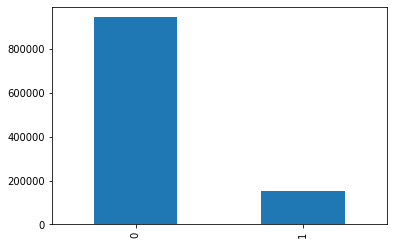

In [82]:
total_count = len(label_df.toxic)
toxic_count = label_df.toxic.value_counts()[0]
general_count = label_df.toxic.value_counts()[1]


print(f"일반 문장 : {100 * (general_count / total_count)}, 욕설 문장 {100 * (toxic_count / total_count)}")

label_df.toxic.value_counts().plot(kind="bar")

### Resampling
---



In [83]:
count_class_0, count_class_1 = label_df.toxic.value_counts()

# Divide by class
df_class_0 = label_df[label_df['toxic'] == 0]
df_class_1 = label_df[label_df['toxic'] == 1]

Random under-sampling:
1    151919
0    151919
Name: toxic, dtype: int64


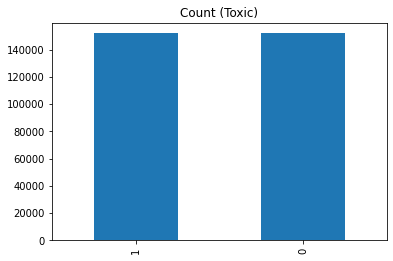

In [84]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.toxic.value_counts())

df_test_under.toxic.value_counts().plot(kind='bar', title='Count (Toxic)');

In [16]:
df_test_under.head()

,title_tag,toxic,id,title
769111,브리지트,0,769117,누비는 브리지트를 팼어오
351991,대상 혁 클라 쓰,0,351992,대상혁 인지도 클라쓰.jpg
185091,트 너구리 베릴 지투 삼 대 떡 젠지 넘버원,0,185092,팩트)너구리.베릴 빠지면 지투한테 삼대떡 당한 젠지가 lck 넘버원 ㅋ1
240773,전용준 ㅈ ㄴ,0,240774,전용준 ㅈㄴ 시끄럽기만하네ㅋㅋㅋㅋ
730944,막장 드라마 최적화 배우,0,730950,막장드라마 최적화 배우는?


In [17]:
x = df_test_under.title
y = df_test_under.toxic

In [18]:
from jamo import h2j, j2hcj

sample_text = "안녕하세요 저는 홍나단입니다."

j2hcj(h2j(sample_text))

'ㅇㅏㄴㄴㅕㅇㅎㅏㅅㅔㅇㅛ ㅈㅓㄴㅡㄴ ㅎㅗㅇㄴㅏㄷㅏㄴㅇㅣㅂㄴㅣㄷㅏ.'

In [19]:
def split_jamo(text):
    return j2hcj(h2j(text))

In [28]:
jamo_x = []


for title in x:
    jamo_x.append(split_jamo(title))

jamo_x[:5]

['ㅇㅣ ㅈㅜㅇㅇㅔ ㅁㅝㄱㅏ ㅈㅔㅇㅣㄹ ㅈㅗㅎㅇㅡㅁ?',
 'ㄷㅏㄴㅈㅏㅇㄷㅡㄹㅇㅣ ㄸㅗㅇㅆㅏㅈㅐㄲㅣㄴㅡㄴㄱㅓㄴ ㅁㅗㄷㅡㄴ ㅅㅡㅍㅗㅊㅡㄱㅏ ㄸㅗㄱㄱㅏㅌㄴㅗ',
 'ㅍㅏㄹㅡㅎㅗㄹㄹㅡㄴ ㄷㅐㄹㅣㅁㅏㅌㄱㅕㅆㄴㅡㄴㄷㅔ',
 'ㅁㅜㄴㅁㅕㅇ 5ㅅㅏㄹㄲㅏ 6ㅅㅏㄹㄲㅏ?',
 'ㅅㅗㄹㅈㅣㄱㅎㅣ ㄴㅓㄱㅜㄹㅣ ㅍㅐㄴㅇㅣㄴㄷㅔ ㄴㅓㅁㅜㅎㅏㄴㅔ...']

In [23]:
import pickle    

with open("./jamo_x.pickle", "rb") as f:
    jamo_x = pickle.load(f)
jamo_x[:5]

['ㅇㅣ ㅈㅜㅇㅇㅔ ㅁㅝㄱㅏ ㅈㅔㅇㅣㄹ ㅈㅗㅎㅇㅡㅁ?',
 'ㄷㅏㄴㅈㅏㅇㄷㅡㄹㅇㅣ ㄸㅗㅇㅆㅏㅈㅐㄲㅣㄴㅡㄴㄱㅓㄴ ㅁㅗㄷㅡㄴ ㅅㅡㅍㅗㅊㅡㄱㅏ ㄸㅗㄱㄱㅏㅌㄴㅗ',
 'ㅍㅏㄹㅡㅎㅗㄹㄹㅡㄴ ㄷㅐㄹㅣㅁㅏㅌㄱㅕㅆㄴㅡㄴㄷㅔ',
 'ㅁㅜㄴㅁㅕㅇ 5ㅅㅏㄹㄲㅏ 6ㅅㅏㄹㄲㅏ?',
 'ㅅㅗㄹㅈㅣㄱㅎㅣ ㄴㅓㄱㅜㄹㅣ ㅍㅐㄴㅇㅣㄴㄷㅔ ㄴㅓㅁㅜㅎㅏㄴㅔ...']

In [24]:
def get_max_length(jamo_x: list):
    max_length = 0
    for x in jamo_x:
        curr_len = len(x)
        
        if curr_len > max_length:
            max_length = curr_len
    return max_length

In [27]:
max_len = get_max_length(jamo_x)

max_len

173

In [69]:
jamo_data = []
jamo_toxic = []
jamo_plain = []
y_values = list(y)
for i in range(len(jamo_x)):
    toxic = y_values[i]
    jamo_data.append([jamo_x[i], toxic])
    if toxic == 1:
        jamo_toxic.append(jamo_x[i])
    else:
        jamo_plain.append(jamo_x[i])

len(jamo_plain), len(jamo_toxic), len(jamo_data)

(151919, 151919, 303838)

In [70]:
with open("./jamo_toxic.pickle", "wb") as f:
    pickle.dump(jamo_toxic, f)
    
with open("./jamo_plain.pickle", "wb") as f:
    pickle.dump(jamo_plain, f)
    
with open("./jamo_data.pickle", "wb") as f:
    pickle.dump(jamo_data, f)

In [67]:
title_toxic = []
title_plain = []
title_total = []
for title, toxic in zip(x, y):

    if toxic == 1:
        title_toxic.append(title)
    else:
        title_plain.append(title)
        
    title_total.append([title, toxic])

len(title_toxic), len(title_plain), len(title_total)

(151919, 151919, 303838)

In [65]:
title_toxic[:5], title_plain[:5]

([['분석데스크가 왜 좆돌 철밥통인지 이제 알겠네'],
  ['프리시즌 좆망함.ㅇㅇ'],
  ['노래방가면 섹스엄청함'],
  ['16년도 롤 입문이라 그런데 14삼화 어느정도였음?'],
  ['짱깨 관여 안한다면서 개 씨발 ㅋㅋ']],
 [['누비는 브리지트를 팼어오'],
  ['대상혁 인지도 클라쓰.jpg'],
  ['팩트)너구리.베릴 빠지면 지투한테 삼대떡 당한 젠지가 lck 넘버원 ㅋ1'],
  ['전용준 ㅈㄴ 시끄럽기만하네ㅋㅋㅋㅋ'],
  ['막장드라마 최적화 배우는?']])

In [68]:
with open("./title_toxic.pickle", "wb") as f:
    pickle.dump(title_toxic, f)
    
    
with open("./title_plain.pickle", "wb") as f:
    pickle.dump(title_plain, f)
    
with open("./title_total.pickle", "wb") as f:
    pickle.dump(title_total, f)